# Week 9: Advanced Supervised Learning Algorithms

# Hands-On: Implement a Random Forest or XGBoost classifier.

In [1]:
# Real-World Example: Bank Loan Approval Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset
data = {
    'Age': [25, 45, 35, 33, 52, 28, 42, 39],
    'Income': [40000, 80000, 60000, 50000, 120000, 45000, 75000, 90000],
    'CreditScore': [650, 700, 680, 620, 720, 640, 690, 710],
    'LoanApproved': [0, 1, 1, 0, 1, 0, 1, 1]  # 1 = Approved, 0 = Not Approved
}

df = pd.DataFrame(data)

# Features & Target
X = df[['Age', 'Income', 'CreditScore']]
y = df['LoanApproved']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# Client Project: Advanced Classifier – Customer Churn Prediction
#XGBoost Classifier for Churn Prediction

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Step 1: Sample Client Data
data = {
    'CustomerAge': [25, 40, 30, 45, 60, 35, 50, 28, 42, 55],
    'MonthlyCharges': [300, 700, 450, 800, 1000, 500, 850, 400, 650, 900],
    'ContractType': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1],  # 0 = Monthly, 1 = Yearly
    'SupportCalls': [2, 0, 3, 1, 0, 4, 1, 2, 0, 0],
    'Tenure': [5, 24, 12, 36, 48, 10, 30, 6, 20, 40],
    'Churn': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0]  # Target
}

df = pd.DataFrame(data)

# Step 2: Features & Target
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.6666666666666666

 Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\91832\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:38:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\91832\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91832\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91832\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Preci

# Week 10: Clustering and Unsupervised Learning

# Hands-On: Apply K-means clustering and use PCA for dimensionality reduction.

C:\Users\91832\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91832\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


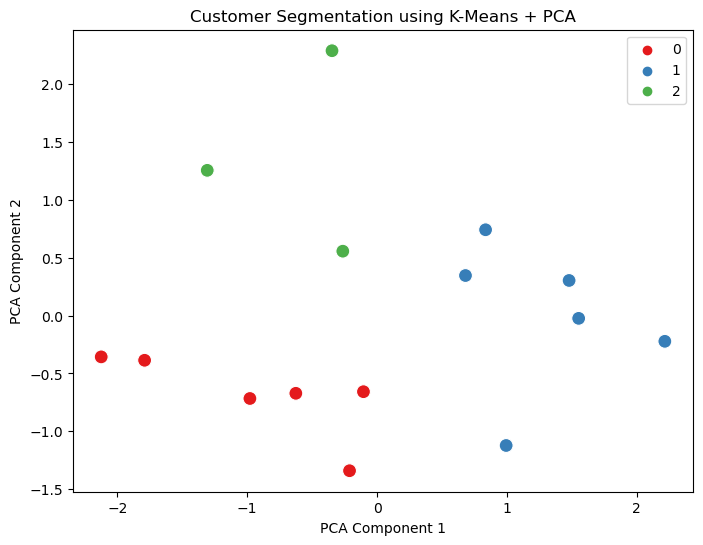

 Clustered Customer Data:
     Age  AnnualIncome  SpendingScore  Cluster
0    19         15000             39        2
1    21         18000             81        0
2    20         22000              6        2
3    23         25000             77        0
4    31         40000             40        2
5    35         60000             60        0
6    40         80000             20        1
7    45         85000             55        1
8    60         30000             35        1
9    70         20000             50        1
10   25         50000             70        0
11   28         55000             65        0
12   50         75000             30        1
13   55         90000             25        1
14   38         65000             75        0


In [3]:
# Customer Segmentation in Retail
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Create Sample Data
data = {
    'Age': [19, 21, 20, 23, 31, 35, 40, 45, 60, 70, 25, 28, 50, 55, 38],
    'AnnualIncome': [15000, 18000, 22000, 25000, 40000, 60000, 80000, 85000, 30000, 20000, 50000, 55000, 75000, 90000, 65000],
    'SpendingScore': [39, 81, 6, 77, 40, 60, 20, 55, 35, 50, 70, 65, 30, 25, 75]
}

df = pd.DataFrame(data)

# Step 2: Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Apply PCA (2D reduction)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 4: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Step 5: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette="Set1", s=100)
plt.title("Customer Segmentation using K-Means + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

print(" Clustered Customer Data:\n", df)

# Client Project: Create a customer segmentation model based on purchasing behavior.

C:\Users\91832\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91832\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


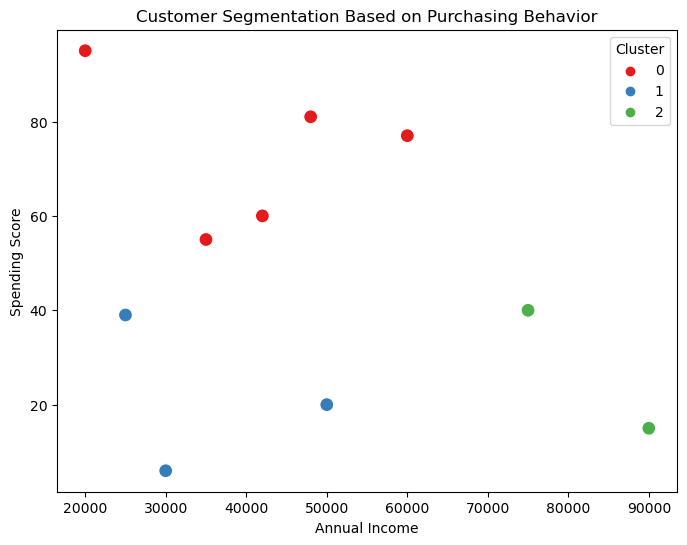

 Segmented Customer Data:
    CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   25         25000             39        1
1           2   34         48000             81        0
2           3   22         30000              6        1
3           4   45         60000             77        0
4           5   52         75000             40        2
5           6   23         20000             95        0
6           7   40         50000             20        1
7           8   36         42000             60        0
8           9   60         90000             15        2
9          10   30         35000             55        0


In [4]:
# Customer Segmentation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Create Sample Customer Data
data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Age': [25, 34, 22, 45, 52, 23, 40, 36, 60, 30],
    'AnnualIncome': [25000, 48000, 30000, 60000, 75000, 20000, 50000, 42000, 90000, 35000],
    'SpendingScore': [39, 81, 6, 77, 40, 95, 20, 60, 15, 55]
}

df = pd.DataFrame(data)

# Step 2: Select Features
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore',
                hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segmentation Based on Purchasing Behavior")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

print(" Segmented Customer Data:\n", df)

# Week 11: Introduction to Deep Learning

# Hands-On: Build a simple neural network using Keras.

In [5]:
# Predicting Customer Churn in Telecom
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Create Sample Data
data = {
    'Age': [25, 40, 35, 28, 50, 45, 23, 30, 60, 38],
    'MonthlyCharges': [300, 700, 450, 400, 1000, 750, 250, 600, 850, 500],
    'ContractType': [0, 1, 0, 0, 1, 1, 0, 1, 1, 0],  # 0 = Monthly, 1 = Yearly
    'Tenure': [5, 24, 12, 10, 48, 36, 3, 20, 50, 15],
    'Churn': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]          # Target
}

df = pd.DataFrame(data)

# Step 2: Features & Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Build Neural Network
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(4, activation='relu'),                                   # Hidden layer 2
    Dense(1, activation='sigmoid')                                 # Output layer
])

# Step 4: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train Model
model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=1)

# Step 6: Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(" Model Accuracy:", accuracy)

C:\Users\91832\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7619 - loss: 0.6914
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4786 - loss: 0.7359 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5286 - loss: 0.7410 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7119 - loss: 0.6705 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7119 - loss: 0.6652 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.6654 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5786 - loss: 0.6947 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6619 - loss: 0.6431 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7119 - loss: 0.6483 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4381 - loss: 0.6699 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3214 - loss: 0.6822     
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4381 - loss: 0.6474

# Client Project: Implement a simple neural network for image classification (e.g., MNIST dataset).

In [6]:
# Neural Network for Image Classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Step 1: Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 2: Build Neural Network
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Flatten 28x28 image → 784 features
    Dense(128, activation='relu'),        # Hidden layer 1
    Dense(64, activation='relu'),         # Hidden layer 2
    Dense(10, activation='softmax')       # Output layer (10 digits: 0–9)
])

# Step 3: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train Model
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Step 5: Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(" Test Accuracy:", accuracy)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 61s 5us/step


C:\Users\91832\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8728 - loss: 0.4310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9665 - loss: 0.1081
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0716
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9836 - loss: 0.0510
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0390
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9738 - loss: 0.0890
 Test Accuracy: 0.9765999913215637
